# Random_Forest_Classification

In [1]:
import pyforest
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('car_evaluation.csv',header=None)
df.head()

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


The original dataset does not have proper column names so,we rename with suitable names

In [3]:
col_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns=col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
print(f'\033[1m The dataset has {df.shape[0]} rows and {df.shape[1]} columns.\033[0m')

 The dataset has 1728 rows and 7 columns.


In [5]:
missing_percentage=df.isnull().sum()/df.shape[0]
missing_percentage

buying      0.0
maint       0.0
doors       0.0
persons     0.0
lug_boot    0.0
safety      0.0
class       0.0
dtype: float64

The dataset does not have missing values

In [6]:
for col in col_names:
    print(df[col].value_counts())

high     432
med      432
low      432
vhigh    432
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    432
Name: maint, dtype: int64
4        432
3        432
5more    432
2        432
Name: doors, dtype: int64
4       576
more    576
2       576
Name: persons, dtype: int64
med      576
small    576
big      576
Name: lug_boot, dtype: int64
high    576
med     576
low     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [7]:
X=df.drop('class',axis=1)
y=df['class']

splitting the dataset into independent and dependent sets

# Ordinal encoding

converting the categorical features into numerical values 

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
encoder=OrdinalEncoder()
X=encoder.fit_transform(df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']])
X=pd.DataFrame(X,columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X.head()

<IPython.core.display.Javascript object>

,buying,maint,doors,persons,lug_boot,safety
0,3.0,3.0,0.0,0.0,2.0,1.0
1,3.0,3.0,0.0,0.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,1.0
4,3.0,3.0,0.0,0.0,1.0,2.0


In [10]:
y=encoder.fit_transform(df[['class']])
y=pd.DataFrame(y,columns=['class'])
y.head()

<IPython.core.display.Javascript object>

,class
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0


splitting the data into train and test datasets

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier

# create the classifier with n_estimators = 100
rfc=RandomForestClassifier(n_estimators=100,random_state=0)

# fit the model to the training set
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [14]:
# predicting the test set
y_pred=rfc.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9544658493870403

In [16]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)


# fit the model to the training set

clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

Now, I will use the feature importance variable to see feature importance scores.

In [17]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

<IPython.core.display.Javascript object>

safety      0.265392
persons     0.222230
buying      0.201751
maint       0.154568
lug_boot    0.089286
doors       0.066773
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

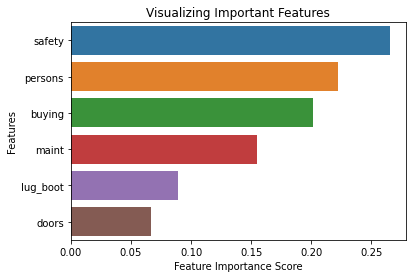

In [18]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

from the above graph we observe that the feature 'doors' has less importance compared to others.we may get more accuracy by droping 
doors feature from the dataset

In [19]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[113   7   8   1]
 [  1  18   0   1]
 [  5   0 392   0]
 [  3   0   0  22]]


In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90       129
         1.0       0.72      0.90      0.80        20
         2.0       0.98      0.99      0.98       397
         3.0       0.92      0.88      0.90        25

    accuracy                           0.95       571
   macro avg       0.89      0.91      0.90       571
weighted avg       0.96      0.95      0.95       571



# Conclusion

1.In this project, I build a Random Forest Classifier to predict the safety of the car.

2.The accuracy of the model is 0.95

3.from the feature importance we can say fetures 'safety' has more importance and 'doors' has least importance

4.Confusion matrix and classification report are another tool to visualize the model performance. They yield good performance